In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2lab, lab2rgb
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [45]:
# Loading images
count_imgs = 1
imgs = []
for i in range(count_imgs):
    # for Google Colab Loading process
    # imgs.append(img_to_array(load_img("/content/dataset/color/" + str(i) + ".jpg", target_size=(256, 256))))
    
    # for Local env loading process
    imgs.append(img_to_array(load_img("./dataset/color/" + str(i) + ".jpg", target_size=(256, 256))))

imgs = np.array(imgs, dtype=float) / 255.0
labs = np.array([rgb2lab(rgb) for rgb in imgs])

# Split train and test data
split = int(0.9 * len(imgs))
trainSet, testSet = labs[:split], labs[split:]

# train and test dateset reshape
x_train = trainSet[:, :, :, 0]
x_train = x_train.reshape(x_train.shape + (1, ))
x_test = testSet[:, :, :, 0]
x_test = x_test.reshape(x_test.shape + (1, ))

y_train, y_test = trainSet[:, :, :, 1:] / 128.0, testSet[:, :, :, 1:] / 128.0    
x_train.shape, y_train.shape, x_test.shape, y_test.shape, imgs.shape, labs.shape

((0, 256, 256, 1),
 (0, 256, 256, 2),
 (1, 256, 256, 1),
 (1, 256, 256, 2),
 (1, 256, 256, 3),
 (1, 256, 256, 3))

In [46]:
new_model = tf.keras.models.load_model('model_final/0402_3kimg_8-e04')

In [47]:
# Check its architecture
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  4640        ['conv2d[0][0]']                 
                                )                                                             

In [48]:
new_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['accuracy'])
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  4640        ['conv2d[0][0]']                 
                                )                                                             

In [49]:
y_pred = new_model.predict(x_test)
y_pred.shape

2022-05-14 02:47:27.045391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(1, 256, 256, 2)

In [50]:
y_pred_ab = y_pred * 128.0
y_pred_lab = np.zeros(testSet.shape)


y_pred_lab.shape

(1, 256, 256, 3)

In [59]:
for i in range(len(x_test)):
    y_pred_lab[i, :, :, 0] = x_test[i].reshape(x_test.shape[1:3])
    
    y_pred_lab[i, :, :, 1:] = y_pred_ab[i]

y_pred_lab.shape


(1, 256, 256, 3)

In [60]:

    


y_pred_rgb = [lab2rgb(lab) for lab in y_pred_lab]

testSet_rgb = [lab2rgb(lab) for lab in testSet[0:20]]
# testSet_rgb = img


[array([[[0.34367105, 0.38727003, 0.44139784],
         [0.33491419, 0.38868249, 0.44809382],
         [0.28956712, 0.34164912, 0.39800431],
         ...,
         [0.32456543, 0.28483311, 0.23182163],
         [0.32996411, 0.28781277, 0.24109588],
         [0.32996243, 0.28783482, 0.24083469]],
 
        [[0.3300166 , 0.39026884, 0.44487541],
         [0.32934572, 0.39061178, 0.44335035],
         [0.28282345, 0.34343673, 0.39661042],
         ...,
         [0.33387377, 0.28183879, 0.22787208],
         [0.34557995, 0.28300634, 0.23037627],
         [0.34094566, 0.28449179, 0.23341691]],
 
        [[0.77491394, 0.8320687 , 0.89394874],
         [0.76914255, 0.83326549, 0.89716868],
         [0.70472034, 0.76613952, 0.8292741 ],
         ...,
         [0.30342526, 0.24981784, 0.19888595],
         [0.32054996, 0.25983758, 0.20787335],
         [0.31640862, 0.26144476, 0.20725114]],
 
        ...,
 
        [[0.16480821, 0.15229103, 0.15067387],
         [0.1649442 , 0.15215097, 0.15163

In [53]:
len(x_test)

1

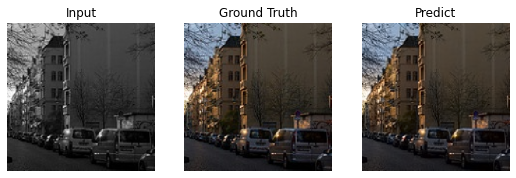

array([[[0.34367105, 0.38727003, 0.44139784],
        [0.33491419, 0.38868249, 0.44809382],
        [0.28956712, 0.34164912, 0.39800431],
        ...,
        [0.32456543, 0.28483311, 0.23182163],
        [0.32996411, 0.28781277, 0.24109588],
        [0.32996243, 0.28783482, 0.24083469]],

       [[0.3300166 , 0.39026884, 0.44487541],
        [0.32934572, 0.39061178, 0.44335035],
        [0.28282345, 0.34343673, 0.39661042],
        ...,
        [0.33387377, 0.28183879, 0.22787208],
        [0.34557995, 0.28300634, 0.23037627],
        [0.34094566, 0.28449179, 0.23341691]],

       [[0.77491394, 0.8320687 , 0.89394874],
        [0.76914255, 0.83326549, 0.89716868],
        [0.70472034, 0.76613952, 0.8292741 ],
        ...,
        [0.30342526, 0.24981784, 0.19888595],
        [0.32054996, 0.25983758, 0.20787335],
        [0.31640862, 0.26144476, 0.20725114]],

       ...,

       [[0.16480821, 0.15229103, 0.15067387],
        [0.1649442 , 0.15215097, 0.15163324],
        [0.12912946, 0

In [67]:
count = 1
n_sample = x_test.shape[0]
fig = plt.figure(figsize=(9, 3 * n_sample))

def extract_single_dim_from_LAB_convert_to_RGB(image, idim):
    z = np.zeros(image.shape)
    if idim != 0 : z[:, :, 0] = 80 # Brightness
    z[:, :, idim] = image[:, :, idim]
    z = lab2rgb(z)
    return z
    
for test_rgb, pred_rgb, test_lab in zip(testSet_rgb, y_pred_rgb, testSet):

    ax = fig.add_subplot(n_sample, 3, count)
    lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(test_lab, 0) 
    ax.imshow(lab_rgb_gray)
    ax.axis("off")
    ax.set_title("Input")
    count += 1
    
    ax = fig.add_subplot(n_sample, 3, count)
    ax.imshow(test_rgb)
    ax.axis("off")
    ax.set_title("Ground Truth")
    count += 1

    ax = fig.add_subplot(n_sample, 3, count)
    ax.imshow(pred_rgb)
    ax.axis("off")
    ax.set_title("Predict")
    count += 1
plt.show()
lab_rgb_gray.shape, test_rgb.shape, pred_rgb.shape

